## Quarterly GDP for CA, FL, NY, TX, WA and US - 2020-2023
- Data sourced from U.S. Department of Commerce - Bureau of Economic Analysis
- https://www.bea.gov/

In [66]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [9]:
# Read CSV files
gdp_csv = ("../Data/GDP_2020-2023_quarterly.csv")
gdp_df = pd.read_csv(gdp_csv)

industry_csv = ("../Data/Quarterly_GDP_Industry_By_State_2020-2023.csv")
industry_df = pd.read_csv(industry_csv, skiprows=3)

In [10]:
# Clear blank spaces in cells so we can cast values to float64
for column in gdp_df.columns:
    gdp_df[column] = gdp_df[column].str.strip()
# Remove commas from US - Washington columns, cast as float
for column in (gdp_df.columns)[1:]:
    gdp_df[column] = gdp_df[column].str.replace(',','').astype(float)

In [11]:
# Rename columns to remove extra spaces
gdp_df = gdp_df.rename(columns = {' United States ':'United States',' California ':'California',' Florida ':'Florida',
                         ' New York ':'New York',' Texas ':'Texas',' Washington ':'Washington'})

In [12]:
# Display preview
gdp_df.head()

,Quarter,United States,California,Florida,New York,Texas,Washington
0,2020:Q1,21727657.0,3118522.7,1152589.9,1821606.8,1840874.8,619251.6
1,2020:Q2,19935444.0,2871237.9,1066451.9,1660253.4,1676440.7,584351.8
2,2020:Q3,21684551.0,3126987.5,1166652.6,1790068.9,1819976.6,637585.2
3,2020:Q4,22068767.0,3190272.4,1182323.3,1821550.1,1871282.8,639342.9
4,2021:Q1,22656793.0,3279904.9,1220392.1,1840547.4,1957009.4,662224.7


In [13]:
# Statistical analysis of GDP figures
gdp_df.iloc[:,1:].describe()

,United States,California,Florida,New York,Texas,Washington
count,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,16.000000
mean,2.469072e+07,3.507877e+06,1.376682e+06,1.980388e+06,2.227977e+06,714652.306250
std,2.575257e+06,3.179839e+05,1.845896e+05,1.620174e+05,3.241438e+05,74126.124362
min,1.993544e+07,2.871238e+06,1.066452e+06,1.660253e+06,1.676441e+06,584351.800000
25%,2.250979e+07,3.257497e+06,1.210875e+06,1.835812e+06,1.935578e+06,656504.250000
50%,2.499626e+07,3.582506e+06,1.388740e+06,2.021110e+06,2.278332e+06,716150.100000
75%,2.684180e+07,3.742068e+06,1.537711e+06,2.100794e+06,2.518272e+06,772876.500000
max,2.829697e+07,3.936165e+06,1.642249e+06,2.207141e+06,2.647608e+06,831911.300000


In [23]:
# Calculate percent change for each column
gdp_df['US % Change'] = gdp_df['United States'].pct_change()
gdp_df['CA % Change'] = gdp_df['California'].pct_change()
gdp_df['FL % Change'] = gdp_df['Florida'].pct_change()
gdp_df['NY % Change'] = gdp_df['New York'].pct_change()
gdp_df['TX % Change'] = gdp_df['Texas'].pct_change()
gdp_df['WA % Change'] = gdp_df['Washington'].pct_change()

# Reorganize columns
gdp_pc = gdp_df[['Quarter','CA % Change','FL % Change','NY % Change','TX % Change','WA % Change','US % Change']]

# Drop first row (NaN)
gdp_pc = gdp_pc.iloc[1:,:]

# Display dataframe
gdp_pc


,Quarter,CA % Change,FL % Change,NY % Change,TX % Change,WA % Change,US % Change
1,2020:Q2,-0.079295,-0.074734,-0.088578,-0.089324,-0.056358,-0.082485
2,2020:Q3,0.089073,0.093957,0.078190,0.085619,0.091098,0.087739
3,2020:Q4,0.020238,0.013432,0.017587,0.028191,0.002757,0.017718
4,2021:Q1,0.028096,0.032198,0.010429,0.045812,0.035790,0.026645
5,2021:Q2,0.029441,0.045997,0.030923,0.045050,0.035307,0.031428
6,2021:Q3,0.026374,0.034174,0.021817,0.037018,0.008133,0.023670
7,2021:Q4,0.031286,0.043408,0.040190,0.052783,0.029825,0.035743
8,2022:Q1,0.004793,0.016383,0.004291,0.040760,0.012232,0.017696
9,2022:Q2,0.014094,0.030575,0.001849,0.047330,0.016533,0.023410
10,2022:Q3,0.012964,0.032660,0.017053,0.018029,0.023216,0.018066


In [18]:
# Statistical analysis of percent change in GDP, quarterly 2020 - 2023
gdp_pc.describe()

,CA % Change,FL % Change,NY % Change,TX % Change,WA % Change,US % Change
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.016164,0.024427,0.013428,0.025211,0.020272,0.018297
std,0.033254,0.034016,0.033876,0.038029,0.029318,0.033475
min,-0.079295,-0.074734,-0.088578,-0.089324,-0.056358,-0.082485
25%,0.008798,0.017342,0.007364,0.014555,0.014382,0.016841
50%,0.016615,0.025752,0.015604,0.028191,0.020151,0.018066
75%,0.027235,0.033417,0.020123,0.045431,0.028177,0.025157
max,0.089073,0.093957,0.078190,0.085619,0.091098,0.087739


In [26]:
# Statistical analysis of percent change in GDP, 2020:Q2 - 2023:Q1
gdp_pc.iloc[0:12,:].describe()

,CA % Change,FL % Change,NY % Change,TX % Change,WA % Change,US % Change
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.017435,0.026532,0.013611,0.027891,0.020305,0.019443
std,0.037341,0.038005,0.038083,0.042174,0.033070,0.037624
min,-0.079295,-0.074734,-0.088578,-0.089324,-0.056358,-0.082485
25%,0.011832,0.022528,0.008895,0.017016,0.011207,0.017671
50%,0.021979,0.031387,0.016329,0.038889,0.020905,0.020738
75%,0.028432,0.036483,0.024094,0.046191,0.031196,0.027841
max,0.089073,0.093957,0.078190,0.085619,0.091098,0.087739


In [ ]:
# May omit this section

# Create lists to store spliced strings from Quarter column
# year = []
# quarter = []

# Year splice + quarter splice loop
# for i in gdp_df.iloc[:,0]:
    # year.append(i[:4])
    # quarter.append(i[5:])

# Insert columns into dataframe
# gdp_df.insert(1,"Quart",quarter)
# gdp_df.insert(2,"Year",year)

In [ ]:
# Display DataFrame
gdp_df

## Industry breakdown of GDP

In [27]:
# Preview dataframe
industry_df

,GeoFips,GeoName,LineCode,Description,2020:Q1,2020:Q2,2020:Q3,2020:Q4,2021:Q1,2021:Q2,2021:Q3,2021:Q4,2022:Q1,2022:Q2,2022:Q3,2022:Q4,2023:Q1,2023:Q2,2023:Q3,2023:Q4
0,6000,California,1.0,All industry total,3118522.7,2871237.9,3126987.5,3190272.4,3279904.9,3376467.2,3465519.5,3573941.6,3591071.1,3641685.3,3688897.5,3720008.9,3808244.2,3836679.8,3900426.7,3936165.1
1,6000,California,2.0,Private industries,2759259.4,2521761.5,2768349.1,2833621.2,2915463.2,3009396.7,3091048.3,3199317.3,3216875.9,3266071.4,3305247.5,3333024.5,3409034.0,3433178.7,3489861.2,3520636.1
2,6000,California,3.0,"Agriculture, forestry, fishing and hunting",35105.6,38280.5,40365.0,42531.6,37807.2,40639.4,43821.9,51268.9,46088.0,46381.2,47584.0,52614.1,46792.6,49548.2,48382.0,48126.3
3,6000,California,6.0,"Mining, quarrying, and oil and gas extra...",8013.2,5465.3,7760.4,7618.3,8860.1,9300.3,9973.1,11773.2,11345.0,12969.3,11385.7,11175.2,9863.8,9616.0,10496.2,10167.1
4,6000,California,10.0,Utilities,37989.9,41506.4,44531.2,45383.0,46841.4,45116.5,46683.7,50872.1,47474.8,56451.0,58336.1,53701.3,54601.4,51631.0,52667.4,51391.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,53000,Washington,86.0,State and local,58066.9,55044.3,55896.6,55934.1,58305.5,58463.7,59150.5,58469.5,62008.3,61255.9,62264.5,64385.7,64779.9,66290.2,66964.9,67924.3
135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,Legend/Footnotes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,"1. For levels: millions of dollars, seasonally...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Remove NaN values (last 2 rows)
industry_df = industry_df.dropna()

# Remove blank spaces that are included in strings
industry_df = industry_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Remove aggregate descriptions
industry_df = industry_df[(industry_df['Description'] != 'Private industries') & (industry_df['Description'] != 'All industry total')
& (industry_df['Description'] != 'Manufacturing') & (industry_df['Description'] != 'Government and government enterprises')]

# Rename GeoName to State
industry_df = industry_df.rename(columns = {'GeoName':'State'})

# Drop 'GeoFips' and 'LineCode' columns
industry_df = industry_df.drop(columns=['GeoFips','LineCode'])

# Preview DataFrame
industry_df.head()

,State,Description,2020:Q1,2020:Q2,2020:Q3,2020:Q4,2021:Q1,2021:Q2,2021:Q3,2021:Q4,2022:Q1,2022:Q2,2022:Q3,2022:Q4,2023:Q1,2023:Q2,2023:Q3,2023:Q4
2,California,"Agriculture, forestry, fishing and hunting",35105.6,38280.5,40365.0,42531.6,37807.2,40639.4,43821.9,51268.9,46088.0,46381.2,47584.0,52614.1,46792.6,49548.2,48382.0,48126.3
3,California,"Mining, quarrying, and oil and gas extraction",8013.2,5465.3,7760.4,7618.3,8860.1,9300.3,9973.1,11773.2,11345.0,12969.3,11385.7,11175.2,9863.8,9616.0,10496.2,10167.1
4,California,Utilities,37989.9,41506.4,44531.2,45383.0,46841.4,45116.5,46683.7,50872.1,47474.8,56451.0,58336.1,53701.3,54601.4,51631.0,52667.4,51391.8
5,California,Construction,128749.6,118677.7,127896.8,128552.6,131602.0,131039.0,129881.6,133164.1,141077.8,138948.3,142382.7,146792.0,145337.2,149109.6,152722.6,155291.9
7,California,Durable goods manufacturing,195565.5,186665.8,214693.9,211828.4,223020.1,226828.6,216469.4,225510.7,230335.4,231225.2,230371.2,233509.7,241779.1,243951.8,250297.6,253739.3


In [29]:
# Define lists for new dataframe to capture quarter, state, description and GDP output values - top 3 values in GDP
# for all states in each quarter
state = []
output = []
desc = []
quart = []

# Start with a for loop for the year 2020
for sta in industry_df['State'].unique().tolist():
    for i in range(1,5):
        output.extend(industry_df[industry_df['State']==sta].nlargest(3,[f'2020:Q{i}']).loc[:,f'2020:Q{i}'].values.tolist())
        state.extend(industry_df[industry_df['State']==sta].nlargest(3,[f'2020:Q{i}']).loc[:,'State'].values.tolist())
        desc.extend(industry_df[industry_df['State']==sta].nlargest(3,[f'2020:Q{i}']).loc[:,'Description'].values.tolist())
        quart.extend([f'2020:Q{i}']*3)

# Then loop through the 2021
for sta in industry_df['State'].unique().tolist():
    for i in range(1,5):
        output.extend(industry_df[industry_df['State']==sta].nlargest(3,[f'2021:Q{i}']).loc[:,f'2021:Q{i}'].values.tolist())
        state.extend(industry_df[industry_df['State']==sta].nlargest(3,[f'2021:Q{i}']).loc[:,'State'].values.tolist())
        desc.extend(industry_df[industry_df['State']==sta].nlargest(3,[f'2021:Q{i}']).loc[:,'Description'].values.tolist())
        quart.extend([f'2021:Q{i}']*3)

# Then loop through the 2022
for sta in industry_df['State'].unique().tolist():
    for i in range(1,5):
        output.extend(industry_df[industry_df['State']==sta].nlargest(3,[f'2022:Q{i}']).loc[:,f'2022:Q{i}'].values.tolist())
        state.extend(industry_df[industry_df['State']==sta].nlargest(3,[f'2022:Q{i}']).loc[:,'State'].values.tolist())
        desc.extend(industry_df[industry_df['State']==sta].nlargest(3,[f'2022:Q{i}']).loc[:,'Description'].values.tolist())
        quart.extend([f'2022:Q{i}']*3)

# Then loop through the 2023
for sta in industry_df['State'].unique().tolist():
    for i in range(1,5):
        output.extend(industry_df[industry_df['State']==sta].nlargest(3,[f'2023:Q{i}']).loc[:,f'2023:Q{i}'].values.tolist())
        state.extend(industry_df[industry_df['State']==sta].nlargest(3,[f'2023:Q{i}']).loc[:,'State'].values.tolist())
        desc.extend(industry_df[industry_df['State']==sta].nlargest(3,[f'2023:Q{i}']).loc[:,'Description'].values.tolist())
        quart.extend([f'2023:Q{i}']*3)


# Create new DataFrame with lists
top_industries = pd.DataFrame({"Quarter":quart,
                   "State":state,
                   "Description":desc,
                   "GDP Output":output})
                   


In [30]:
top_industries

,Quarter,State,Description,GDP Output
0,2020:Q1,California,Real estate and rental and leasing,429916.9
1,2020:Q1,California,Information,317436.1
2,2020:Q1,California,"Professional, scientific, and technical services",300498.5
3,2020:Q2,California,Real estate and rental and leasing,418004.5
4,2020:Q2,California,Information,310535.8
...,...,...,...,...
235,2023:Q3,Washington,Real estate and rental and leasing,107211.8
236,2023:Q3,Washington,Retail trade,84978.6
237,2023:Q4,Washington,Information,135977.2
238,2023:Q4,Washington,Real estate and rental and leasing,108484.4


In [31]:
# Can now filter for specific state and quarters
top_industries[(top_industries['State']=='Florida') & (top_industries['Quarter']=='2023:Q4')]

,Quarter,State,Description,GDP Output
201,2023:Q4,Florida,Real estate and rental and leasing,325214.1
202,2023:Q4,Florida,"Professional, scientific, and technical services",132762.6
203,2023:Q4,Florida,Health care and social assistance,130159.9


In [61]:
# Import and read unemployment csv file into dataframe
unemployment_csv = ("output/unemployment_rates_2020-2023.csv")
unemployment_df = pd.read_csv(unemployment_csv)
unemployment_df = unemployment_df.astype({'Month':'datetime64[ns]'})
unemployment_df = unemployment_df.set_index("Month")

# Resample data into quarterly to do a scatterplot with GDP
quarterly_df = unemployment_df.resample('QE').mean()

# Preview df
quarterly_df.head()

,California,Florida,Texas,Washington,New York,National
Month,,,,,,
2020-03-31,4.733333,3.366667,4.033333,4.233333,4.133333,3.833333
2020-06-30,15.233333,13.133333,11.500000,13.866667,15.300000,13.000000
2020-09-30,11.700000,9.566667,8.366667,9.100000,11.166667,8.800000
2020-12-31,9.100000,6.700000,7.000000,6.933333,8.966667,6.733333
2021-03-31,8.566667,5.633333,6.566667,6.200000,8.366667,6.233333


In [85]:
# Define function to plot linear regression of quarterly state GDP vs quarterly state unemployment rate, 2020-2023
def gdp_regress(state):
    x = gdp_df[state]
    y = quarterly_df[state]
    plt.scatter(x,y)
    (slope,intercept,rvalue,pvalue,stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
    plt.plot(x,regress_values,"r-")
    plt.ylabel('Unemployment Rate')
    plt.xlabel('GDP (millions)')
    plt.title(f'{state} GDP vs Unemployment Rate, 2020-2023')
    plt.annotate(line_eq,xy=(gdp_df[state].min(),quarterly_df[state].min()),fontsize=15,color="red")
    print(f"The r^2 value is: {rvalue**2}")
    plt.show()

The r^2 value is: 0.6534955455640314


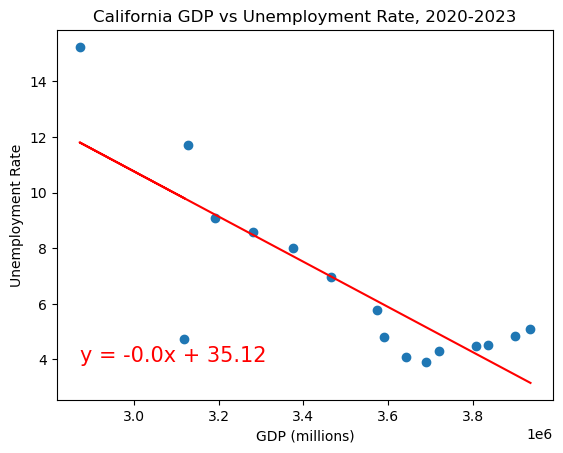

In [86]:
gdp_regress('California')

The r^2 value is: 0.635150687176309


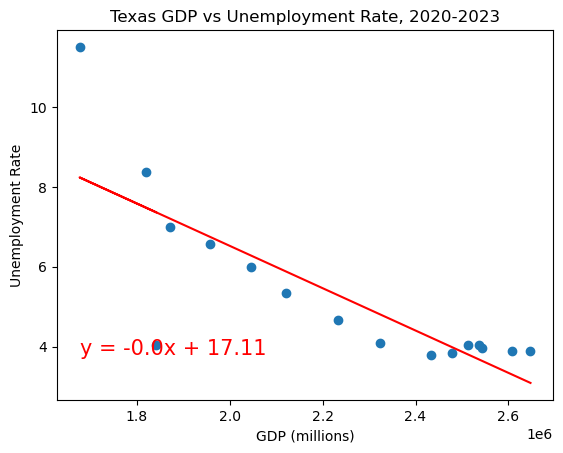

In [87]:
gdp_regress('Texas')

The r^2 value is: 0.5757017087603803


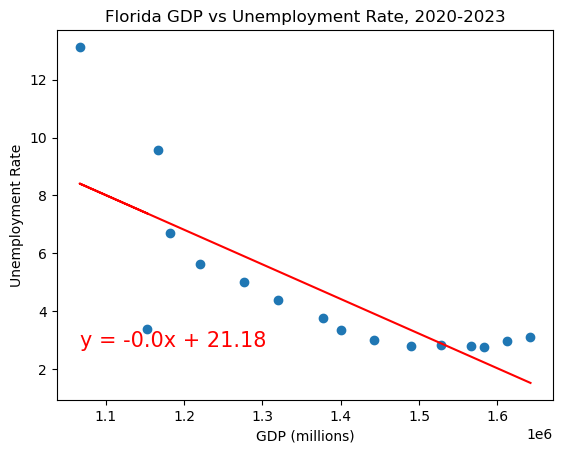

In [88]:
gdp_regress('Florida')

The r^2 value is: 0.4826516178704578


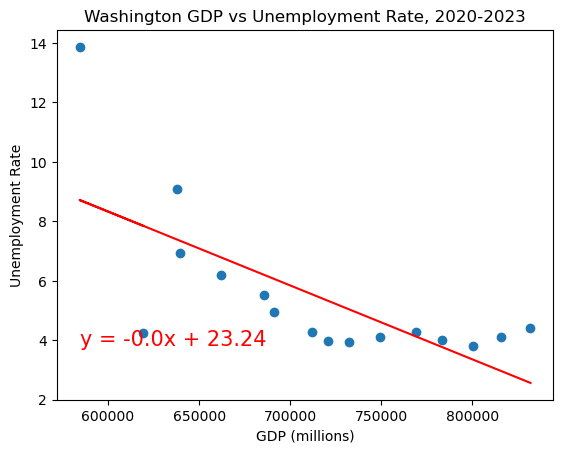

In [89]:
gdp_regress('Washington')

The r^2 value is: 0.6839234732683744


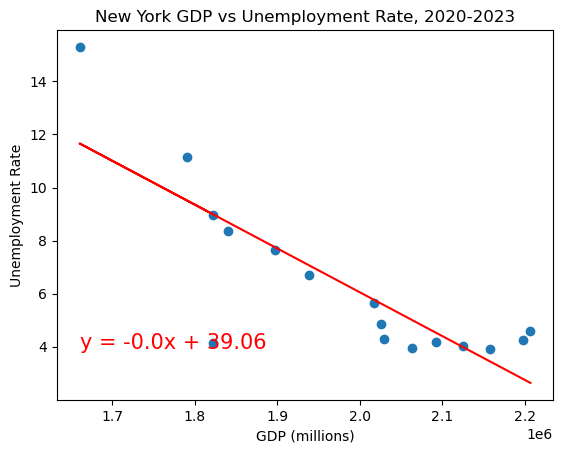

In [90]:
gdp_regress('New York')